# Final Project Submission 1/5
 - Student name: Morgan Jones
 - Student pace: Full Time
 - Scheduled project review date/time: Mon, Jun 22, 2020, 4:00 PM - 4:45 PM France; Paris (GMT+2:00) [DST]
 - Instructor name: Abhineet Kulkarni
 - Blog post URL:
 ***

# Introduction

This project is intended to showcase the transformative power that GANs present to the current platforms available for viewing images and video content. The work is sectioned into 5 Jupyter Notebooks, each focusing on a seperate stage of the project, these are as follows:

1. **Mining & Cleaning LinkedIn Data**: Code associated with scraping LinkedIn for image data related to a person's social media to be fed into a GAN for face generation.
2. **Generating Faces with a DCGAN**: Using a Deep Convolutional Generative Adversarial Network to generate faces based on the scraped image data from LinkedIn.
3. **Generating High-Rez Faces with StyleGAN2**: Create a pre-trained instance of StyleGAN2 to generate high resolution 1024x1024 images of faces.
4. **Animating Faces with First Order Motion Model**: Code which allows mapping of generated faces to motion and expressions in a source video in order to animate the generated faces to match the original video content.
5. **Hypothesis Testing**: Here a hypothesis is made on the public perception of this model affecting change on views of diversity inclusion in media, and testing said hypothesis.

## Business Case

Images are indeed one of the most powerful tools of our era. Images have the power to inform viewers in such dense, instant, and rich ways that other formats of information simply cannot reproduce. Per Domo's Data Never Sleeps 7.0 Report created in 2019, there were:
    - 694,444 hours of Netflix streams
    - 473,000 tweets
    - 46,740 Instagram photo posts
    - 4,500,000 YouTube videos watched
    - 527,760 Snapchat photos shared
    
every minute of the year...

How do all of these images shape our perceptions of ourselves, others, and world-views. This project is intended to explore a new dimension of control that deep learning has created in the images that are available in the world. **With the creative force of  Generative Adversarial Networks (GANs), we are able to generate lifelike faces that are able to be animated and mapped on the current faces within movies, television shows, online learning platforms, advertisements, and any other media that showcases human faces.** Of course such a disruptive technology would need to be applied in a closed and controlled environment, and so for the purposes of this project, **the specific business case is in the frame of a pitch to Netflix executives to enable viewers to utilize GANs and First Order Motion Models to alter the cast of any video streamed on the Netflix Platform.** 

In so doing, Netflix will improve the user's experience by offering more diversity in the videos streamed on the platform. In a business sense this in turn would improve customer satisfaction, which would yield higher revenue streams for the company. From a social standpoint this application can lead to changes in the ways that people view others that differ from themselves, and potentially change the way they perceive themselves. Such a system could empower those in underrepresented groups by giving them the freedom to imbue diversity in the images they view, in ways that current media portrayals do not reproduce.

To demonstrate how GANs are capable of generating image data that is not only descriptive of people, but also personally relevant, the first two notebooks of this project will focus on obtaining image data from the profile pictures of a user's connection base (my own), and from these images generate artificial faces that are aggregated from my personal LinkedIn connections. To begin we will scrape LinkedIn for the aforementioned image data.

# Data Mining

## Import Libraries

In order to access LinkedIn using python we will use the `selenium` framework, a web-automation framework that can start a web browser and complete tasks one might typically take on the web. We will use the `ChromeDriverManager` to open the Chrome web browser to access LinkedIn. 

In order to parse LinkedIn to find and retrieve the image data we are looking for we will use the `BeautifulSoup` 4 library, named after *Beautiful Soup* poem by Lewis Carroll in *Alice's Adventures in Wonderland*. `BeautifulSoup` will reformat the LinkedIn HTML into python objects representing XML structures.

We will use the `re` library in order to identify regular strings found within the LinkedIn HTML.

We will also use the standard python library `urllib`, which has within it some of the necessary functions for requesting data from sites. Specifically we will use the `urlretrieve` and `urlopen` modules to as the names state retrieve and open the urls found within LinkedIn.

We will import the `shutil` module which will enable us to manage files. We will import these in the following cell.
Lastly we will import the `time` module in order to delay the commands to the LinkedIn server.

In [1]:
# Import Libraries
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager
import re
import time

from bs4 import BeautifulSoup
import requests
from urllib.request import urlretrieve
from urllib.request import urlopen
import shutil

Now with Selenium imported, we will use the `webdriver.Chrome()` method with an `.install()` chain to instantiate a webdriver object that will open a Chrome Browser locally. With this driver we will use the `.get()` method to navigate to the LinkedIn homepage. This url can be found by typing in www.linkedin.com in a browser and clicking on the signin button in the top right corner.

In [2]:
# Instantiate a Chrome webdriver
driver = webdriver.Chrome(ChromeDriverManager().install())

# Driver.get method() will navigate to LinkedIN
driver.get('https://www.linkedin.com/login?fromSignIn=true&trk=guest_homepage-basic_nav-header-signin')

[WDM] - Trying to download new driver from http://chromedriver.storage.googleapis.com/83.0.4103.39/chromedriver_win32.zip
[WDM] - Unpack archive C:\Users\morga\.wdm\drivers\chromedriver\83.0.4103.39\win32\chromedriver.zip


<img src='imgs\notebook_images\linkedIn_signup.PNG' width="750" align="center">

Once our driver has reached LinkedIn's home page, it will need to access the username and password elements to enter the relevant user and password information. This is accomplished by first inspecting the site by right clicking on the mouse on a blank area of the page and selecting `Inspect`. This will bring up the site's source code which appears like so:

<img src='imgs\notebook_images\homepage1.PNG' width="750" align="center">

While inspecting the site, we can find the `ids` for the username and password elements by toggling the arrow button in the top left corner of the toolbar for inspection. While hovering over the username and password inputs, we are given the id values we need. Then using the `.find_element_by_id()` method, and entering the username and password ids as strings, we can simulate a user signing in to their LinkedIn profile. For privacy purposes my particular username and password information were omitted, however for replication one only need to insert the relevant information in the `.send_keys()` methods for the username and password objects. Lastly we will use the `time.sleep()` method to force python to enter the values at a slower, more human like pace, here we use 2 seconds. 

<img src='imgs\notebook_images\username1.PNG' width="750" align="center">

<img src='imgs\notebook_images\password.PNG' width="750" align="center">

In [3]:
# Locate username form by_class_name
username = driver.find_element_by_id('username')

# Send_keys() to simulate key strokes
username.send_keys('insert username')

# Sleep for 2 seconds
time.sleep(2)

In [4]:
# Locate password form by_class_name
password = driver.find_element_by_id('password')

# Send_keys() to simulate key strokes
password.send_keys('insert password')

# Sleep for 2 seconds
time.sleep(2)

<img src='imgs\notebook_images\linkedin_signin.PNG' width="750" align="center">

After our program has entered the user information, it needs to be able to find the Sign In button and click it like a user would in order to use the information to sign in. We can use the `find_element_by_xpath()` method to use the xpath of the Sign In button to locate the button, and then use the `.click()` method. Again we will use `.sleep()` to create a 2 second pause in between commands.

In [5]:
# Locate submit button by_xpath
log_in_button = driver.find_element_by_xpath('//*[@id="app__container"]/main/div[2]/form/div[3]/button')

# If that draws an error use:
# log_in_button = driver.find_element_by_xpath('//*[@id="app__container"]/main/div[2]/form/div[4]/button')

# .click() to mimic button click
log_in_button.click()

# Sleep for 2 seconds
time.sleep(2)

<img src='imgs\notebook_images\signin_button1.PNG' width="750" align="center">

Once we have logged into LinkedIn, our program will need to find the network button and "click" on it to find the complete list of connections associated with the profile. We can again use the `.find_element_by_xpath()` method to use the `xpath` of the network button to locate the button, and then use the `.click()` method. Again we will use `.sleep()` to create a 2 second pause in between commands.

In [6]:
# Locate submit button by_xpath
network_button = driver.find_element_by_xpath('//*[@id="mynetwork-tab-icon"]')

# .click() to mimic button click
network_button.click()

# Sleep for 2 seconds
time.sleep(2)

<img src='imgs\notebook_images\network_button.PNG' width="750" align="center">

After we have found the network button and used it to access the network page, we then need to use the connections button. Here we will use the `.find_element_by_class_name()` method on the 'pl3' class to create an object of that button, and then use the `.click()` method to click that object. Lastly we will wait 2 seconds before calling another command.

In [8]:
# Locate submit button by_xpath
connections_button = driver.find_element_by_class_name('pl3')

# .click() to mimic button click
connections_button.click()

# Sleep for 2 seconds
time.sleep(2)

<img src='imgs\notebook_images\connections.PNG' width="750" align="center">

Now we have accessed the connections page that contains the profile images that we can feed into the GAN. We will first need to scroll down the entire connections page so that the page contains all of the connections associated with the profile. 

We can use the `.executive_script()` method to `scrollTo` the bottom of the page by using the height of the page when we are at the bottom of the page. This would be the end of the code required to scroll to the bottom of the page, however LinkedIn will not load if the scrolling action immediately scrolls to the bottom of the page. So to resolve this, we scroll back to the top of the page with `.executive_script()`, and then scroll to the bottom. We also use the `.sleep()` method to slow the scrolling process down. After several seconds with the cell below we have uploaded the entire connections list of the profile. 

In [9]:
# Scroll to the bottom of the page
lenOfPage = driver.execute_script("window.scrollTo(0, document.body.scrollHeight);var lenOfPage=document.body.scrollHeight;return lenOfPage;")
match=False
while(match==False):
    lastCount = lenOfPage
    time.sleep(3) # Sleep for 3 seconds between scrolls
    lenOfPage = driver.execute_script("window.scrollTo(0, document.body.scrollHeight);var lenOfPage=document.body.scrollHeight;return lenOfPage;")
    if lastCount==lenOfPage:
        match=True
        
''' Scroll to the page top '''
driver.execute_script("window.scroll(0, 0);")
time.sleep(5)

# Scroll to the bottom of the page
lenOfPage = driver.execute_script("window.scrollTo(0, document.body.scrollHeight);var lenOfPage=document.body.scrollHeight;return lenOfPage;")
match=False
while(match==False):
    lastCount = lenOfPage
    time.sleep(10) # Sleep for 3 seconds between scrolls
    lenOfPage = driver.execute_script("window.scrollTo(0, document.body.scrollHeight);var lenOfPage=document.body.scrollHeight;return lenOfPage;")
    if lastCount==lenOfPage:
        match=True

<img src='imgs\notebook_images\bottom.PNG' width="750" align="center">

Now with all of the connections loaded, we can create a `page_source` object which we will use to create a `BeautifulSoup` object. 

In [10]:
# Instantiate a page_source object
page_source = driver.page_source

For safe keeping we will change our headers to something more natural appearing, using the same type of header that a person may use when accessing LinkedIn. We will the use `requests` to create a `request` object that we can then use to access all of the source code of the page in text, for viewing purposes.

In [11]:
# Create a new header
headers = {'User-Agent':'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_5)'\
           'AppleWebKit 537.36 (KHTML, like Gecko) Chrome',
           'Accept':'text/html,application/xhtml+xml,application/xml;'\
           'q=0.9,image/webp,*/*;q=0.8'}

# Use requests to get the source code of the page
# r = requests.get(page_source, headers=headers)
# print(r.text)

# Create a BeautifulSoup object
#soup = BeautifulSoup(r.text, 'html.parser')

We will then create a `BeautifulSoup` object and parse it with `html.parser` with the page_source.

In [12]:
# Create a BeautifulSoup object
soup = BeautifulSoup(page_source, 'html')

To confirm that we have indeed accessed the page's source code we will print the first header of the page.

In [13]:
# Print the first header on the page
print(soup.html.h1)

<h1 class="t-18 t-black t-normal">
      849 Connections
    </h1>


We can confirm that this is the first header of the page by a visual check, which it appears to be. Now we need to access the profiles of the page. We can create an empty list which will be used to append all of the profile names. All of the profiles have a unique id. So to work around this we will use the `.find_all()` method to pull the 'href' associated with each profile by using a for loop to find all of those objects with a class entitled "mn-connection-card__link ember-view", which is the pattern to be linked to a profile picture after inspecting the source code:

In [14]:
# Create an empty list
profiles = []

# Run for loop to find all profile names
for link in soup.find_all('a', class_="mn-connection-card__link ember-view"):
    if 'href' in link.attrs:
        profiles.append(link.attrs['href'])

<img src='imgs\notebook_images\profile.PNG' width="750" align="center">

After appending all of the profiles, we can check that the cell ran properly by checking the length of our list with `len()`.

In [15]:
# Check the size of the profiles list
len(profiles)

849

In [16]:
# Check the content of profiles
# profiles

Now that we have all of the profile names, we can manually create the url associated with each of the profiles by visually checking a few profiles. It appears that the common format for a LinkedIn profile is to have the prefix *https://www.linkedin.com* before the href value that we just appended to the profiles list. The pattern associated with the profile picture is to have the suffix *detail/photo/* after the unique profile name. We can thus create a list of the profile picture urls of the connections by manually adding these values before and after the href value in a for loop like so.

In [17]:
# Create the url for profile pictures
profiles = ["https://www.linkedin.com" + url + 'detail/photo/' for url in profiles]
# profiles

While we have successfully found the url for each of the profile pictures in the connections list, we can not retrieve these values, for doing so leads to an HTTP Error 999, denying our access to the photos. While it would be possible to create a program that would visit each of the urls and manually save the image locally, we will settle for the thumbnail profile picture that is on the connections page. Below is the code used to produce the HTTP request error.

In [18]:
# Will trip an HTTP Error 999
"""
img_count = 0
for i in profiles:
    urlretrieve(i, 'profiles/i_{0}.png'.format(img_count))
    img_count += 1
"""

"\nimg_count = 0\nfor i in profiles:\n    urlretrieve(i, 'profiles/i_{0}.png'.format(img_count))\n    img_count += 1\n"

We will use a similar method to pull the thumbnail profile pictures on the connections page as before. We make an empty list that we will fill with the src values associated with each image, and apend these values into our new list. After all of the urls have been appended to our list we can confirm the cell was successful by checking the length and type of our new object.

<img src='imgs\notebook_images\linkedin_image.PNG' width="750" align="center">

In [20]:
# Create an empty list
photos = []

# Run for loop to find all profile picture urls
images = soup.find_all('img', {'src':re.compile('https://media-exp1.licdn.com/dms/image/')})
for image in images:
    photos.append(image['src'])
len(photos)

845

In [21]:
# Confirm type of photos
type(photos)

list

Now let's view a sample of the contents of our list by viewing the first object within it.

In [22]:
# Confirm the objects are urls by viewing the first in the list 
photos[0]

'https://media-exp1.licdn.com/dms/image/C4D03AQEOevPf8wFF4A/profile-displayphoto-shrink_100_100/0?e=1598486400&v=beta&t=iBXRjW7dcFYRqzTWAUbw5Udv0aF6On-gDbw2UUAO2Jw'

After our confirmations, we can now use the `urlretrieve()` method to retrieve the images that are at each of the urls in the list. With this method we create a new file which is the image data we just retrieved, and place it in a new directory with a new name. In this case the directory we assign the picture to is 'imgs/images/' with the name 'i_(number of picture in list).png'. We can later go to this directory to view the photos that were freshly retrieved.

In [24]:
# Instantiate a counter for looping
img_count = 0
# Use a for loop to apply urlretrieve method to all of the urls
for i in photos:
    urlretrieve(i, 'imgs/images/i_{0}.png'.format(img_count))
    img_count += 1

<img src='imgs\notebook_images\pics_list.PNG'>

We have successfully accessed all of the profile pictures associated with a LinkedIn profile and saved them. This will be the data to be fed into our GAN to generate a new face. For exploration purposes, we can use other LinkedIn data to create summary of sorts for our connections profile pic data in the form of a wordcloud. We can again use the `.find_all()` method to access the occupation information of each profile on the connections page much like we did when retrieving the profile pictures.

In [25]:
# Create an empty list
titles = []

# Use for loop to find all text in occupation associated with profiles
for title in soup.find_all('span', class_='mn-connection-card__occupation t-14 t-black--light t-normal'):
    titles.append(title.text)

In [26]:
# Confirm type of object
type(titles)

list

Our titles list contains all of the values that the connections have input for their occupation descriptions, we can remove some of the less valuable characters from the strings in this list with the `.replace()` method.

In [27]:
# Remove unvaluable characters from the strings
titles = [s.replace('\n', '') for s in titles]
titles = [s.replace('   ', '') for s in titles]
titles = [s.replace('|', '') for s in titles]
titles = [s.replace(' at', '') for s in titles]
titles = [s.replace(' of', '') for s in titles]
titles = [s.replace(' and', '') for s in titles]
titles = [s.replace(' in', '') for s in titles]

# View the occupation strings
# titles

In order to create the wordcloud and other visualizations we will need to import a few other libraries these will be:

In [28]:
# Import Libraries
import numpy as np # for manipulating arrays 
import pandas as pd # for manipulating dataframes
from os import path # for accessing system directories
from tqdm import tqdm # for creating progress bars
from PIL import Image # for managing image data
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator # for creating wordclouds
from collections import Counter  # for counting objects
import seaborn as sns # for beautiful visualizations
import matplotlib.pyplot as plt # for visualizations
from matplotlib.pyplot import figure # to create a figure in matplotlib

%matplotlib inline # to view matplotlib objects in jupyter notebooks

UsageError: unrecognized arguments: # to view matplotlib objects in jupyter notebooks


After our imports, we can create a pandas dataframe of the titles list with the pandas `.Dataframe()` method, and check the dataframe with the `.head()` method.

In [29]:
# Create new pandas dataframe
titles_df = pd.DataFrame(titles, columns=['Descriptors'])
# Check dataframe
titles_df.head()

,Descriptors
0,Software Developer Seeking a Junior Position
1,Packaging R&D Engineer @Intel
2,"Frontend Developer, Linguist React.js Node.js"
3,Full Stack Software Developer
4,Full Stack Developer Computer builder Video ...


We can also check the size of our new dataframe with the `.info()` method.

In [30]:
# View description of dataframe
titles_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 849 entries, 0 to 848
Data columns (total 1 columns):
Descriptors    849 non-null object
dtypes: object(1)
memory usage: 6.8+ KB


Now let's create a single string of all of the occupations with the `.join()` method in a for loop. We can also check the length of this text.

In [31]:
# Create a string from all of the dataframe's descriptors
text = " ".join(title for title in titles_df.Descriptors)
# Print the length of the new string
print('There are {} words in the total Descriptors dataframe.'.format(len(text)))

There are 43438 words in the total Descriptors dataframe.


To be safe, we can also check the datatype of the object we created.

In [32]:
# Check the type of the new string
type(text)

str

We will now create our word cloud from the newly created string. We instantiate a wordcloud object with the `WordCloud()` object and set its parameters such as size and color. We generate it with the text string previously created. We use a list of stopwords to remove those words which are not of value for our visualization. Finally we show our wordcloud through matplotlib, and save the file locally.

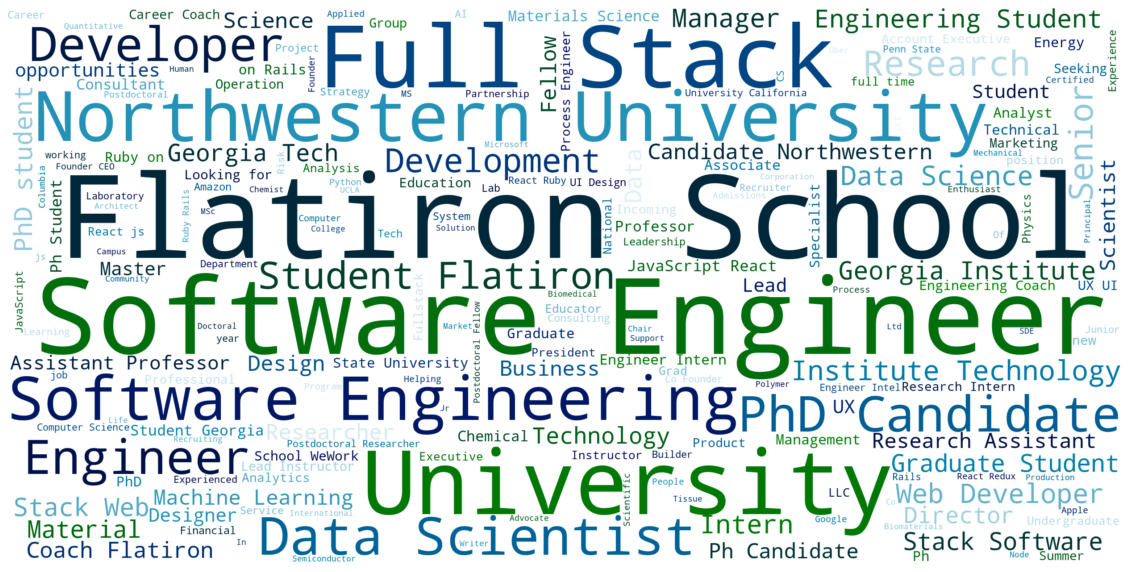

<Figure size 432x288 with 0 Axes>

In [33]:
# Create a wordcloud object
wordcloud = WordCloud(background_color='white', width=2500, height=1250, colormap='ocean').generate(text)

# Create list for stopwords
stopwords = set(STOPWORDS)
stopwords.update([' at', ' of', ' and'])

# Display the wordcloud with MatplotLib
figure(num=None, figsize=(20, 16), facecolor='w', edgecolor='k')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()
plt.savefig('imgs/notebook_images/linkedin_wordclound.png')

We have now created a wordcloud that describes a dimension of the profile data we have scraped. We can see some of the most common values in this group of connections are Flatiron School, Data Scientist, and Software Engineer. As this is my final project for my Data Science cohort at Flatiron School it seems fitting that the wordcloud has these values as the most relevant. To make another visualization of this data we can split our occupation text by the spaces in between words with `.split()`, count these words with the `Counter()` method, and use the `.most_common()` method on these counts to find the most common words in the string. We will accomplish this here to visualize the first common 15 words.

In [34]:
# Split() returns list of all the words in the string 
split_text = text.split() 
  
# Pass the split_it list to instance of Counter class. 
count = Counter(split_text) 
  
# Most_common() produces k frequently encountered 
# input values and their respective counts. 
most_occur = count.most_common(15) 
  
print(most_occur) 

[('Software', 171), ('Engineer', 161), ('University', 137), ('School', 128), ('Flatiron', 126), ('Student', 123), ('Data', 87), ('Engineering', 80), ('PhD', 61), ('Developer', 57), ('Northwestern', 57), ('Full', 56), ('Scientist', 55), ('Science', 53), ('Research', 52)]


To plot these 15 most common words, we can use a for loop that zips the words with their counts, and then plot these values in a `matplotlib` bar plot.

In [35]:
# Create list of tuples of the most common words with their values
text_list = [(elem1, elem2) for elem1, elem2 in most_occur]

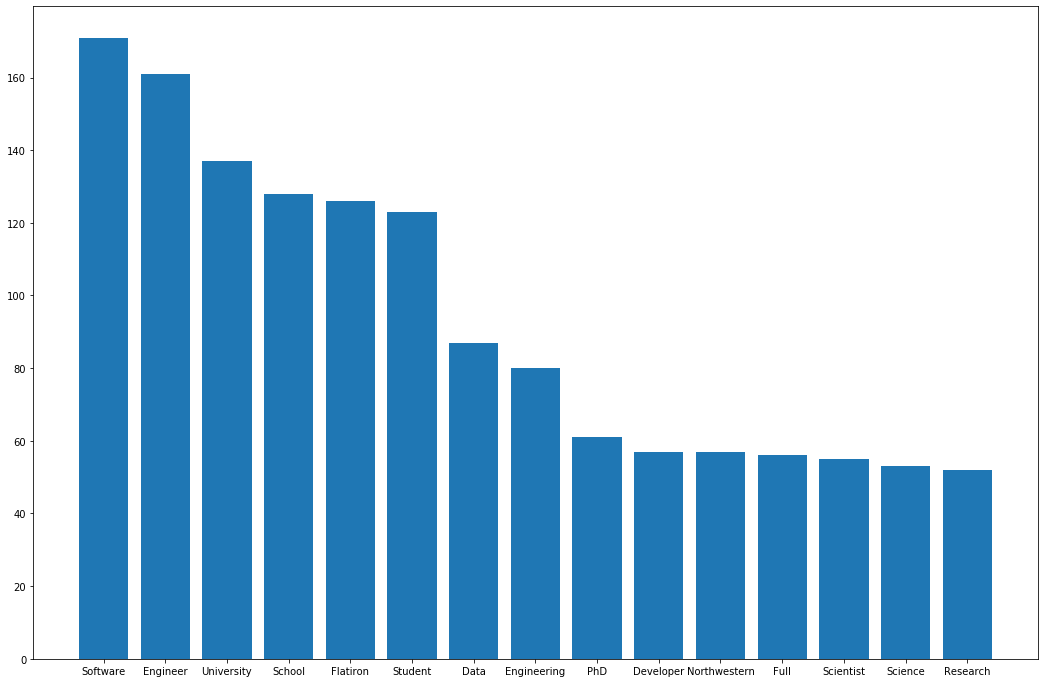

<Figure size 432x288 with 0 Axes>

In [37]:
# Create a plot with the most common 
fig, ax = plt.subplots(figsize=(18,12))
plt.bar(*zip(*text_list))
plt.show()
plt.savefig('imgs/notebook_images/top_ten_words')

We have successfully mined our LinkedIn image data and conducted some exploratory data analysis on the occupation data scraped. Now we will move on to cleaning this scraped data to make it more useful when fed into the Generative Adversarial Networks of the next section.

# Data Cleaning

We will now process the data that we have scraped in preparation for our GAN. We will import a few more libraries in order to accomplish this. Specifically, we will import OpenCV2 in order to further manipulate our image data, and the glob module in order to find all the pathnames matching a specified pattern.

In [38]:
# Import libraries
import cv2 # for managing image data
import os # for managing directories
import glob # for manipulating data in paths
from PIL import Image # for managing image data

Now we will create a path object from the folder that was created that contains the profile picture data we scraped earlier.

In [39]:
# Create path object
base_dir = os.path.dirname('imgs/images/')
# Check the path
base_dir

'imgs/images'

There will be several steps to take in order to locate the faces within each image and extract it. These steps are listed as follows.

 -  We use the `.imread()` method to convert the images in our directory to OpenCV objects.
 
 
 - To effectively complete our image processing it is useful to first convert the input image to gray scale. This is due to the fact that it is easier to detect luminance with a gray scale image than a color image, which helps when detecting objects such as faces in images. This is accomplished with the `.cvtColor()` method. Note that to run the following line, the checkpoints folder must not be in the base_dir,  or else the `cv2.imread()` method will read it and pass a `None` value to the `cv2.cvtColor()` which will cause an error.

- Next we will use OpenCV2's built in face recognition CNN to locate the faces in our image data, and then isolate these faces, so that we can produce a dataset of only face data. This CNN is generated from 3 databases, the AT&T Facedatabase, Yale Facedatabase A, and the Extended Yale Facedatabase B. Combined these datasets contain roughly 2500 images of 100 unique individuals. 


- The CNN is called in as a `faceCascade` object that loads in the Haar Cascade file using the `cv2.CascadeClassifier()` coupled with `haarcascade_frontalface_default.xml` to specify the face CNN. Haar Cascade is an ml object detection algorithm used to identify objects in an image or video. It is an algorithm that focuses on detecting the Edge, Line, and Four-rectangle features within an image.

- We use the `.detectMultiScale()` method on the `faceCascade` object so that we can create rectangles that frame the faces found within the images, more precisely it creates a list of rectangles for each face found in an image, but for many of the profile picture images there should only be one face. These rectangles are described as by 4 pixel locations representative of the rectangle's corners locations. The relevant parameters that we will set in the `.detectMultiScale()` method are:
    
        - gray- Due to the fact that our image is now in gray scale, we inform the method that the image is a grayscale object.
        - scaleFactor- The amount of scaling that takes place during training so as to lower the complexity of the face detection process.
        - minNeighbors- Which determines the classification threshold for face detection in the image.
        - minSize- This parameter determines the minimum size a face can be in order to be identified as a face.


- Once the list of rectangle locations has been created, we use the `.rectangle()` method to frame the face with a rectangle set to the appropriate location. This is done in a for loop to draw a rectangle around each of the images, and takes in four key parameters:

        - image- Informing cv2 to draw the rectangle on the particular image.
        - (x,y), (x+w, y+h)- These are the locations of the four corners of each rectangle, that determine where the rectangle is drawn and ultimately its shape.
        - (255, 255, 255)- The RGB value of the rectangle, which in this case will be white.
        - 0- The pixel thickness of the rectangle, which in this case makes the rectangle invisible.
        
- We then append the faces within these rectangles to a new list, and enumerate through that list to save each face as a file in our new imgs/faces/ directory, with a new name indicated by its location in the list, and set as a .PNG file. We check the number of input images at each step and the final number of faces output from the `faceCascade` object.

**Note: The below cell will not run if the .ipynb checkpoints folder is in the base_dir, which it most likely should be. It is necessary to delete the folder so that OpenCV does not try to operate on the folder as if it were a photo.**

In [40]:
# create new empty lists
files = []
images = []
grays = []
rois = []

# Iterate through directory and append each image to the empty list
for file in os.listdir(base_dir):
    files.append(file)
    
    # Read each file as an OpenCV object and append to new list
    image = cv2.imread(base_dir + '/' + file)
    images.append(image)
    
    # Convert the image to grayscale and append to new list
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    grays.append(gray)

    # Instantiate faceCascade object
    faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")
    faces = faceCascade.detectMultiScale(
        gray,
        scaleFactor=1.3,
        minNeighbors=3,
        minSize=(5, 5)
    )
    
    # Iterate through images and draw rectangles on the faces
    for (x, y, w, h) in faces:
        cv2.rectangle(image, (x, y), (x+w, y+h), (255, 255, 255), 0)
        roi_color = image[y:y + h, x:x + w] 
        rois.append(roi_color)
        
        # Save new rectangles as a cv2 image in new directory
        i = 0
        for (i, roi_color) in enumerate(rois):
            cv2.imwrite('imgs/faces/' + '{}'.format(i+1) + '_faces.PNG', roi_color)

# Check the lengths of all the new lists
print('Number of files in directory: ' + '{}'.format(len(files)))
print('Number of images read: ' + '{}'.format(len(images)))
print('Number of images in grayscale: ' + '{}'.format(len(grays)))
print('Number of faces images in new directory: ' + '{}'.format(len(rois)))

Number of files in directory: 845
Number of images read: 845
Number of images in grayscale: 845
Number of faces images in new directory: 666


Upon manually checking the directory we can see that we now have 666 new images each containing the face of a LinkedIn connection. We will now need to normalize our data by conforming all of the images to one size. At the time of this project, this is the only way that GANs can successfully be fed in images, with them all being of equal size. To do this we will create two new empty lists, one for the images that have been freshly made and another for the resized images to be created.

In [41]:
# Create two new empty lists
image_list = []
resized_images = []

We will now use the glob module to access the files in the new faces directory, and append each file to our new list with a for loop.

In [42]:
# Iterate through each directory and append each file to our new list
for filename in glob.glob('imgs/faces/*.png'):
    # print(filename)
    img = cv2.imread(filename, cv2.IMREAD_UNCHANGED)
    image_list.append(img)

To ensure the cell above worked accordingly we will check the size of our new list to confirm it is the same size as the directory itself.

In [43]:
# Check the size of the image list
len(image_list)

666

Our image list is indeed the same size as the directory it pulled from. We will now alter the shape of our images to be 128x128 pixels in size.

In [44]:
# Set the percentage of scaling for each image
scale_percent = 128
# Set the new width of each image
width = int(img.shape[1]* scale_percent / 100)
# Set the new height of each image
height = int(img.shape[0]* scale_percent / 100)
# Create the new dimensions of each image
dim = (width, height)

With these new dimensions created we will iterate through the images list and resize each image accordingly with a for loop, and use of the `.resize()` method. We set the interpolation parameter to `cv2.INTER_NEAREST` to create the closest quality of image considering the image is now roughly a third larger than before. We append these new images to our resized_images list, and finally write these new images to a new directory called 'resized_faces' and assign a new name, again related to the place that the image held in the list.

In [45]:
# resize each image with cv2.resize
for image in image_list:
    image = cv2.resize(image, dim, interpolation = cv2.INTER_NEAREST)
    resized_images.append(image)
    
    # write resized images to a new directory
    i = 0
    for (i, new) in enumerate(resized_images):
        cv2.imwrite('imgs/resized_faces/' + '{}'.format(i+1) + '_faces.PNG', new)

We can now view the resized images by opening the images from their directory and using matplotlib to plot all of the images of our dataset in one image.

In [48]:
# Create a path variable
DATA_PATH = 'imgs/resized_faces'

# Number of images in directory
IMAGES_COUNT = 666

# Dimensions of the images
WIDTH = 128
HEIGHT = 128

# Create a new list
images = []
# Iterate through the directory and read in each image as a thumbnail
for pic_file in tqdm(os.listdir(DATA_PATH)[:IMAGES_COUNT]):
    pic = Image.open(DATA_PATH + '/' + pic_file)
    pic.thumbnail((WIDTH, HEIGHT), Image.ANTIALIAS)
    images.append(np.uint8(pic))

100%|██████████| 666/666 [00:01<00:00, 427.74it/s]


Now we will use `matplotlib` to plot each of the images in a subplot of 666 images. We instantiate a `matplotlib` figure, and set its size, and then show each image in the images list.

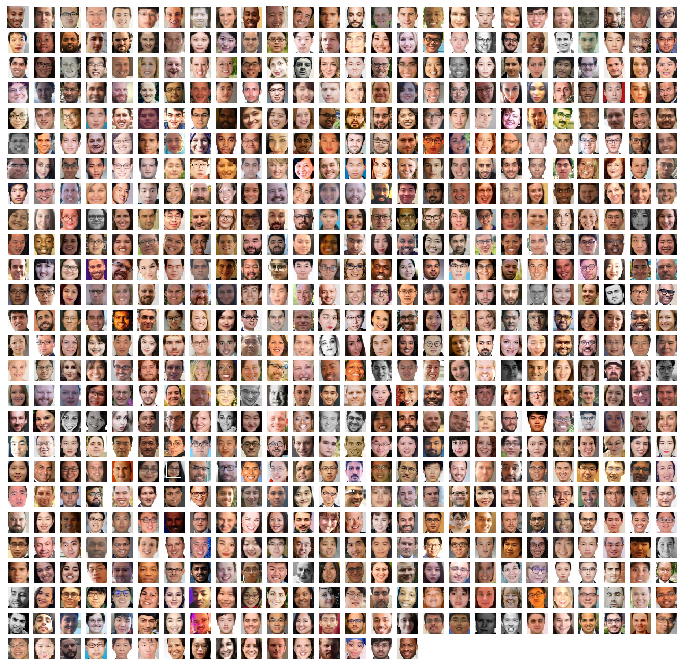

<Figure size 432x288 with 0 Axes>

In [51]:
# Instantiate a matplotlib figure
plt.figure(1, figsize=(12, 12))
# Loop through each of the images and plot them in a subplot
for i in range(666):
    plt.subplot(26, 26, i+1)
    plt.imshow(images[i])
    plt.axis('off')
# Show the plot
plt.show()
# Save plot
plt.savefig('imgs/notebook_images/linkedin_dataset.png')

Now we can see all of the images in our dataset. To inspect some of the images by pixel distributions, we can create a function that creates a histogram of the pixel intensities for a particular image. First we will convert the images into numpy arrays which the function will interpret as pixel values.

In [52]:
# Convert images into numpy arrays of pixels
images = np.array(images) / 255
# View the shape of pixel distributions
# print(images.shape)

Now we create our `plotHistogram` function that counts the pixel values for the image.

In [53]:
# Create a function that takes in a numpy array
def plotHistogram(a):
    """
    Plot histogram of RGB Pixel Intensities
    """
    # Create a matplotlib figure and set its size
    plt.figure(figsize=(10,5))
    # Create a subplot on figure
    plt.subplot(1,2,1)
    # Plot the numpy array for image
    plt.imshow(a)
    # Make the plots axis invisible
    plt.axis('off')
    # Create the histogram plot
    his = plt.subplot(1,2,2)
    # Set the ylabel for the histogram to Count
    his.set_ylabel('Count')
    # Set the xlabel for the histogram to Pixel Intensity
    his.set_xlabel('Pixel Intensity')
    # Set the number of bins for the histogram
    n_bins = 30
    # Plot the histogram for the values of each pixel based on RGB channels
    plt.hist(a[:,:,0].flatten(), bins= n_bins, lw = 0, color='r', alpha=0.5);
    plt.hist(a[:,:,1].flatten(), bins= n_bins, lw = 0, color='g', alpha=0.5);
    plt.hist(a[:,:,2].flatten(), bins= n_bins, lw = 0, color='b', alpha=0.5);

Let's check the pixel intensities of my own face with our new function.

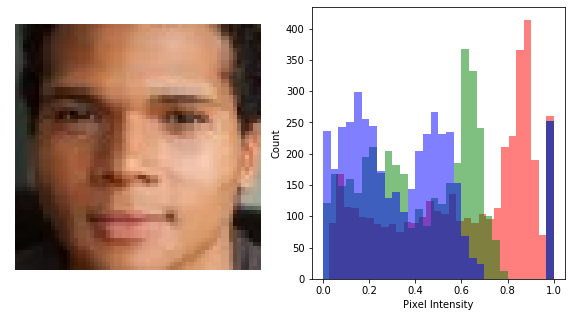

In [55]:
# Show image and histogram of pixel intensities
plotHistogram(images[12])
plt.savefig('imgs/notebook_images/face_pixels.png')

Here we can see the various pixel values for an image within our dataset. This is data that the GAN will use at some point in order to understand the distribution of data that creates the images, much like what we see above.

# Conclusion

To recap for this notebook, we have successfully

- Navigated LinkedIn with `selenium` in order to locate the connections page of a particular user.
- Scraped LinkedIn for profile picture data related to a particular user with `BeautifulSoup`.
- Located and extracted faces from the profile picture data using `OpenCV2`. 
- Created visualizations with `wordCloud` & `matplotlib` based on the occupation information of the connections of a particular user.
- Resized these face images that will be fed into our GAN in the next notebook. 
- Visualized the entire dataset retrieved from LinkedIn and explored the pixel intensity values of a sample of images from the dataset.

In conclusion, the data that has been retrieved is relatively small for success when working with GANs to produce high quality images, even when conducting transfer learning with deep architectures with little over 660 images of faces produced. Considering this low amount of data, we have decided to keep the size of the images within the low range of 128x128, however depending on the method these dimensions may change. In the following notebook we will create a Deep Convolutional Generative Adversarial Network that will utilize these images to generate faces that relate to a user's social media network.